Таблица истинности мультиплексора:
   a1  a2   F
0   0   0  X1
1   0   1  X2
2   1   0  X3
3   1   1  X4

Таблица истинности дешифратора:
   a1  a2  D0  D1  D2  D3
0   0   0   1   0   0   0
1   0   1   0   1   0   0
2   1   0   0   0   1   0
3   1   1   0   0   0   1


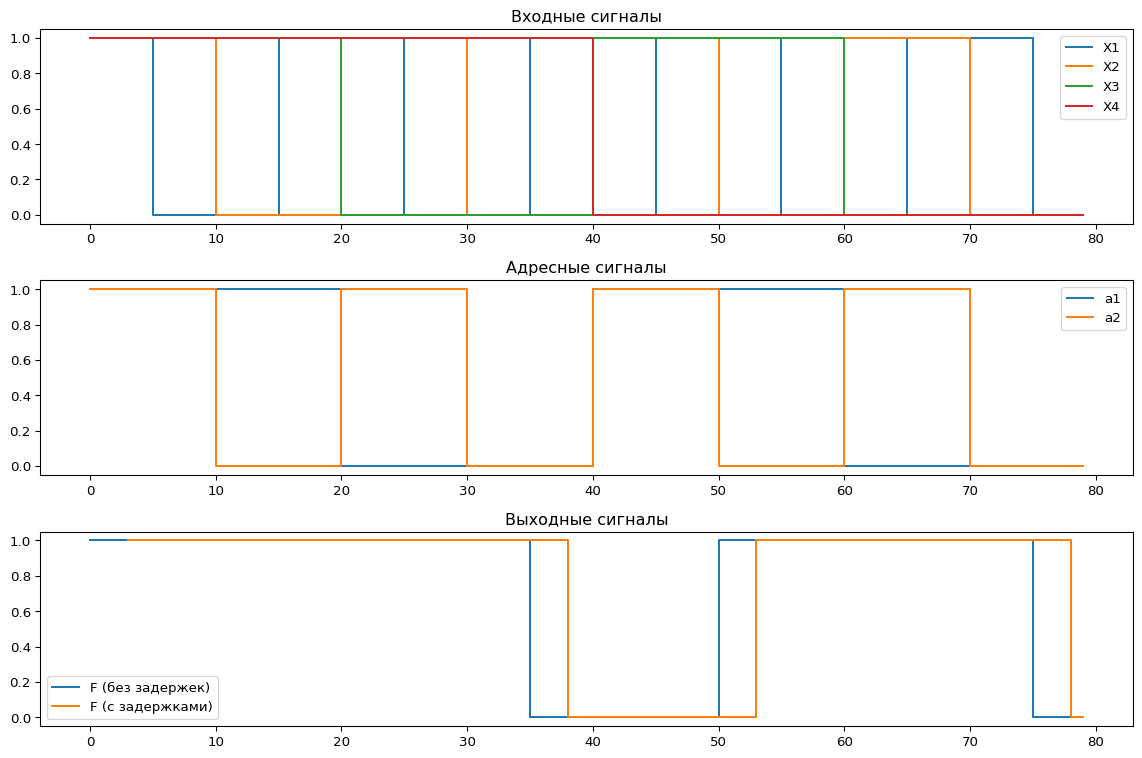


Моменты возможных гонок сигналов:
           F_ideal  F_delayed
Time (μs)                    
0                1        NaN
1                1        NaN
2                1        NaN
35               0        1.0
36               0        1.0
37               0        1.0
50               1        0.0
51               1        0.0
52               1        0.0
75               0        1.0
76               0        1.0
77               0        1.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Таблицы истинности
# ----------------------------

# Таблица истинности мультиплексора
mux_truth_table = pd.DataFrame({
    'a1': [0, 0, 1, 1],
    'a2': [0, 1, 0, 1],
    'F': ['X1', 'X2', 'X3', 'X4']
})
print("Таблица истинности мультиплексора:")
print(mux_truth_table)

# Таблица истинности дешифратора
decoder_truth_table = pd.DataFrame({
    'a1': [0, 0, 1, 1],
    'a2': [0, 1, 0, 1],
    'D0': [1, 0, 0, 0],
    'D1': [0, 1, 0, 0],
    'D2': [0, 0, 1, 0],
    'D3': [0, 0, 0, 1]
})
print("\nТаблица истинности дешифратора:")
print(decoder_truth_table)

# ----------------------------
# 2. Генерация входных сигналов
# ----------------------------
t_total = 80  # Общее время моделирования в мкс
time = np.arange(0, t_total, 1)

# Генерация меандров с удвоением периода
def generate_meander(period):
    return np.where((time // (period//2)) % 2 == 0, 1, 0)

signals = {
    'X1': generate_meander(10),
    'X2': generate_meander(20),
    'X3': generate_meander(40),
    'X4': generate_meander(80),
    'a1': generate_meander(40),
    'a2': generate_meander(20)
}

df = pd.DataFrame(signals, index=time)
df.index.name = 'Time (μs)'

# ----------------------------
# 3. Моделирование мультиплексора
# ----------------------------
def mux_logic(row):
    a1, a2 = row['a1'], row['a2']
    if a1 == 0 and a2 == 0: return row['X1']
    if a1 == 0 and a2 == 1: return row['X2']
    if a1 == 1 and a2 == 0: return row['X3']
    return row['X4']

# Без задержек
df['F_ideal'] = df.apply(mux_logic, axis=1)

# С задержками (имитация задержки в 1 мкс на элемент)
df['F_delayed'] = df['F_ideal'].shift(3)  # Примерная модель задержки

# ----------------------------
# 4. Визуализация
# ----------------------------
plt.figure(figsize=(12, 8))

# Входные сигналы
plt.subplot(3, 1, 1)
plt.title('Входные сигналы')
plt.step(df.index, df['X1'], where='post', label='X1')
plt.step(df.index, df['X2'], where='post', label='X2')
plt.step(df.index, df['X3'], where='post', label='X3')
plt.step(df.index, df['X4'], where='post', label='X4')
plt.legend()

# Сигналы выбора
plt.subplot(3, 1, 2)
plt.title('Адресные сигналы')
plt.step(df.index, df['a1'], where='post', label='a1')
plt.step(df.index, df['a2'], where='post', label='a2')
plt.legend()

# Выходные сигналы
plt.subplot(3, 1, 3)
plt.title('Выходные сигналы')
plt.step(df.index, df['F_ideal'], where='post', label='F (без задержек)')
plt.step(df.index, df['F_delayed'], where='post', label='F (с задержками)')
plt.legend()

plt.tight_layout()
plt.show()

# ----------------------------
# 5. Анализ гонок сигналов
# ----------------------------
# Поиск моментов, когда сигналы отличаются
glitches = df[df['F_ideal'] != df['F_delayed']]
print("\nМоменты возможных гонок сигналов:")
print(glitches[['F_ideal', 'F_delayed']])